In [67]:
import numpy as np
import pandas as pd

In [68]:
df_agency = pd.read_csv('/content/agency.txt')
df_calender = pd.read_csv('/content/calendar.txt')
df_routes = pd.read_csv('/content/routes.txt')
df_shapes = pd.read_csv('/content/shapes.txt')
df_stop_times = pd.read_csv('/content/stop_times.txt')
df_stops = pd.read_csv('/content/stops.txt')
df_trips = pd.read_csv('/content/trips.txt')

In [69]:
df_agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone,agency_fare_url,agency_email
0,DMRC,Delhi Metro Rail Corporation,http://www.delhimetrorail.com/,Asia/Kolkata,NaN,NaN,NaN,NaN


In [70]:
df_calender.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,weekday,1,1,1,1,1,0,0,20190101,20251231
1,saturday,0,0,0,0,0,1,0,20190101,20251231
2,sunday,0,0,0,0,0,0,1,20190101,20251231


In [71]:
df_routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off
0,33,NaN,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,31,NaN,G_DD_R,GRAY_Dhansa Bus Stand to Dwarka,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,29,NaN,P_MS_R,PINK_Shiv Vihar to Majlis Park,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,M_JB,MAGENTA_Janak Puri West to Botanical Garden,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,P_MS,PINK_Majlis Park to Shiv Vihar,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df_shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857


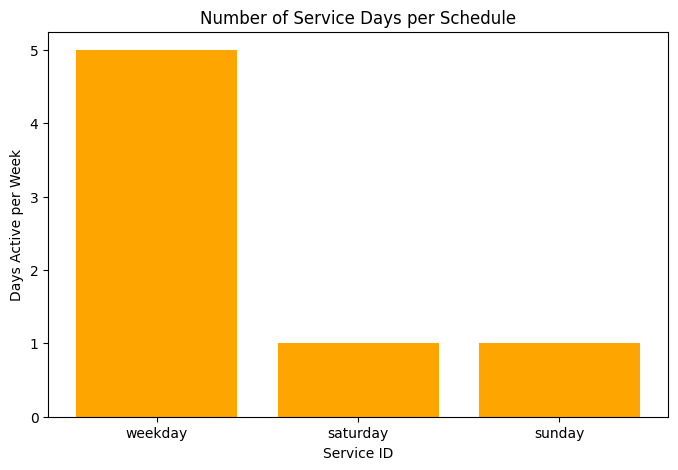

In [73]:
import matplotlib.pyplot as plt
df_calender['service_days'] = df_calender[['monday','tuesday','wednesday','thursday','friday','saturday','sunday']].sum(axis=1)
plt.figure(figsize=(8, 5))
plt.bar(df_calender['service_id'], df_calender['service_days'], color='orange')
plt.title('Number of Service Days per Schedule')
plt.xlabel('Service ID')
plt.ylabel('Days Active per Week')
plt.show()

In [74]:
df_shapes.head(20)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857
5,shp_1_2,28.618710,77.022369,6,315.208
6,shp_1_2,28.618958,77.022285,7,343.930
7,shp_1_2,28.619217,77.022163,8,375.033
8,shp_1_2,28.619474,77.022018,9,407.190
9,shp_1_2,28.619741,77.021797,10,443.984


In [75]:
import plotly.express as px
df_shapes_sorted = df_shapes.sort_values('shape_pt_sequence')
fig = px.line_mapbox(
    df_shapes_sorted,
    lat="shape_pt_lat",
    lon="shape_pt_lon",
    color="shape_id",
    zoom=10.2,
    title="Delhi Metro Route (Smooth)"
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

/tmp/ipython-input-83-3010014472.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



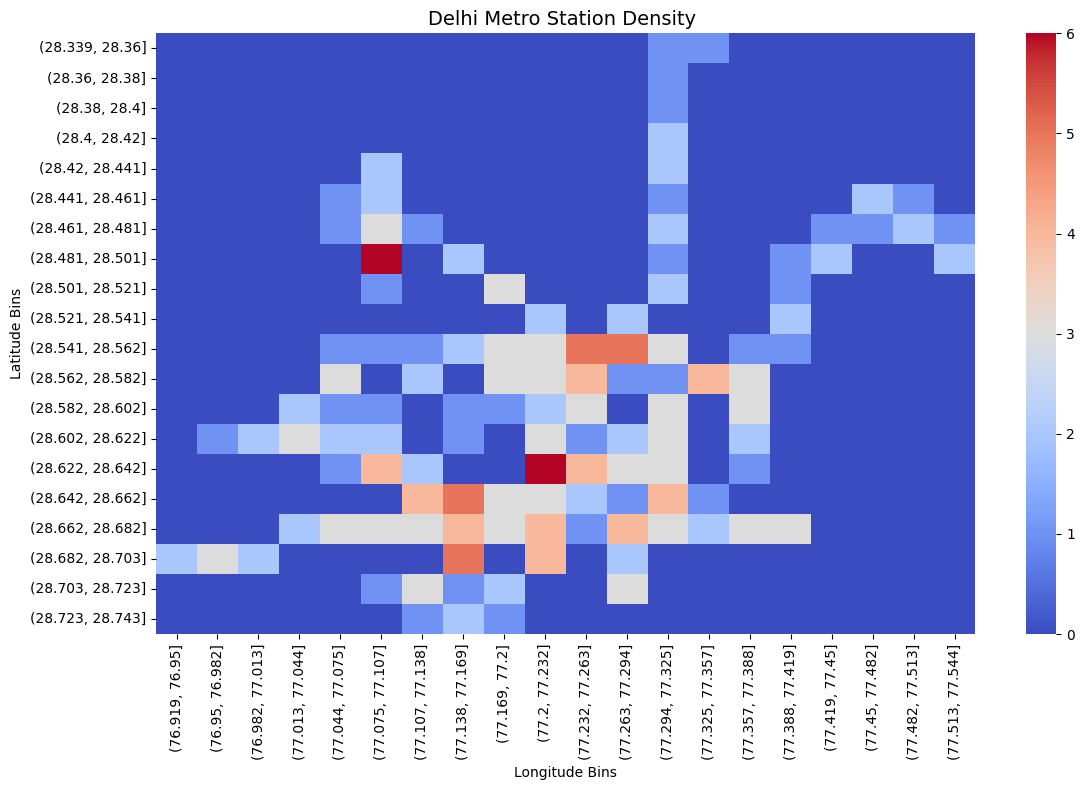

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
lat_bins = pd.cut(df_stops['stop_lat'], bins = 20)
lon_bins = pd.cut(df_stops['stop_lon'], bins = 20)
heatmap_data = df_stops.groupby([lat_bins, lon_bins]).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title("Delhi Metro Station Density ", fontsize=14)
plt.xlabel("Longitude Bins")
plt.ylabel("Latitude Bins")
plt.tight_layout()
plt.show()

In [77]:
df_stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,continuous_pickup,continuous_drop_off
0,0,05:28:08,05:28:28,21,0,NaN,0,0,0.000,1,NaN,NaN
1,0,05:30:58,05:31:18,20,1,NaN,0,0,1202.405,1,NaN,NaN
2,0,05:33:28,05:33:48,19,2,NaN,0,0,2480.750,1,NaN,NaN
3,0,05:35:33,05:35:53,18,3,NaN,0,0,3314.936,1,NaN,NaN
4,0,05:37:53,05:38:13,17,4,NaN,0,0,4300.216,1,NaN,NaN


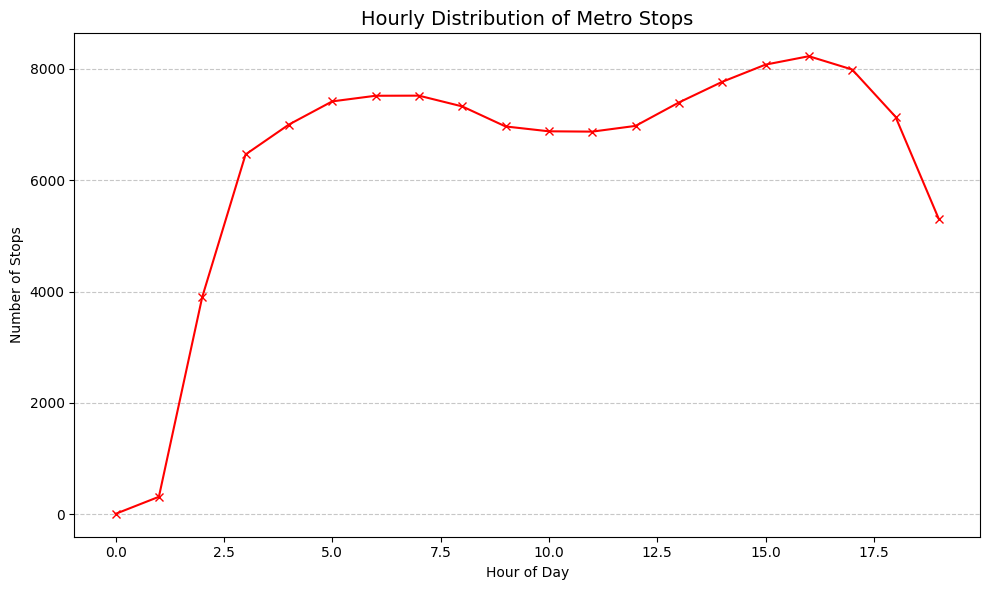

In [78]:
# to calculate hourly status of metro
from datetime import datetime
df_stop_times['arrival_hour'] = pd.to_datetime(df_stop_times['arrival_time'], format='%H:%M:%S', errors='coerce').dt.hour
hourly_counts = df_stop_times['arrival_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.values, marker='x', color = 'r')
plt.title("Hourly Distribution of Metro Stops", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Stops")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [79]:
df_trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0
1,0,weekday,1,NaN,NaN,NaN,NaN,shp_1_30,0,0
2,0,weekday,10,NaN,NaN,NaN,NaN,shp_1_30,0,0
3,0,weekday,100,NaN,NaN,NaN,NaN,shp_1_30,0,0
4,2,weekday,1000,NaN,NaN,NaN,NaN,shp_1_13,0,0


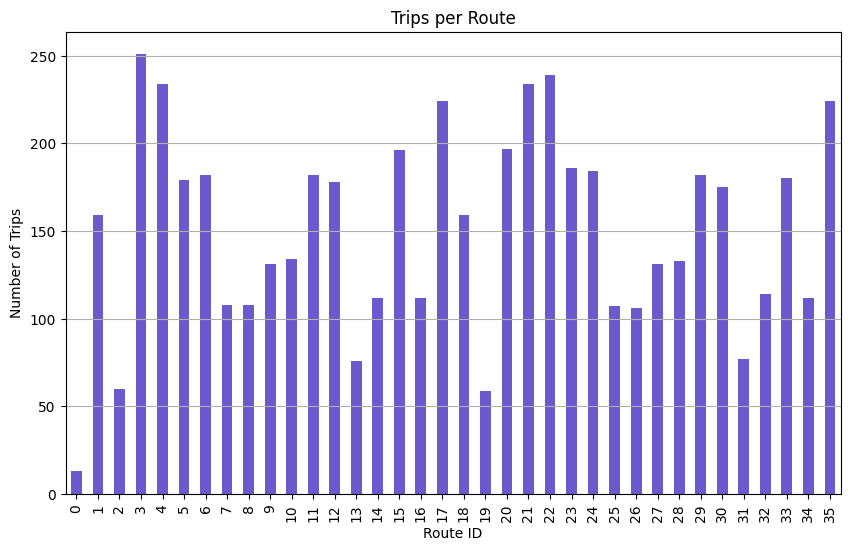

In [85]:
trips_per_route = df_trips['route_id'].value_counts().sort_index()

plt.figure(figsize=(10,6))
trips_per_route.plot(kind='bar', color='slateblue')
plt.xlabel("Route ID")
plt.ylabel("Number of Trips")
plt.title("Trips per Route")
plt.grid(True, axis='y')
plt.show()

/tmp/ipython-input-88-603367553.py:5: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



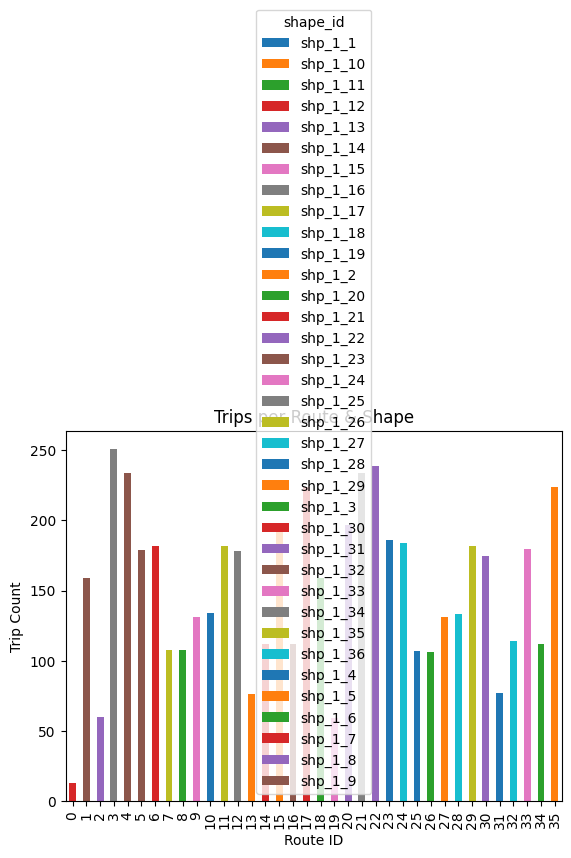

In [88]:
df_trips.groupby(['route_id', 'shape_id']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Trips per Route & Shape")
plt.xlabel("Route ID")
plt.ylabel("Trip Count")
plt.tight_layout()
plt.show()